<h1 align=center><font size = 5>Capstone Project - Car Accident Severity (Week 2)</font></h1>

## Table of Contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results_and_discussion)
* [Conclusion](#conclusion)

<a name="introduction"></a>

## Introduction: Business Problem

Driving cars is a part of our lives in modern societies. It is true that public transportation, as well as alternative transportation methods, are available. However, a large number of people would prefer owning a car since it gives them better control over their time and provides them with much more liberty and autonomy, not to mention that a car is generally faster than a bike for example, especially for longer distances.  
    
Nevertheless, car accidents is a problem that needs to be addressed: it is a major cause of death. For instance, car crashes is a leading cause of death in the U.S.

Let us keep in mind that materialistic loss should be avoided as it is important, but it is not the important thing here. This is stated when taking into consideration people's lives that are being lost and the emotional impact of a loved one's death: two losses that are very hard to compensate, if one claims that it is even possible to do so.
  
In this project, we aim to leverage the power of Machine Learning, more specifically calssification algorithms (KNN, SVM, Random Forest) since we are facing a classification problem, to predict cars accident severity, based on the data in hand. This work will offer insights on how to drive safely. Also, it will help responsilbe parties to better handle this issue and reduce car crash rates.

<a name="data"></a>

## Data

Our dataset can be accessed via the following [link](https://opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv) as a CSV file.

You can click [here](https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0/data?geometry=-122.326%2C47.592%2C-122.318%2C47.594&selectedAttribute=EXCEPTRSNDESC) for a map showing the distribution of the crashes, an overview of the data, as well as the data itself represented in a table.

Moreover, you can also click [here](https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf) for a summary of the data set available in a PDF file. This summary is very important as it helps us to better understand our data, i.e., the available fields and what they represent, as well as their possible values.

The __geopy python package__ was used in order to get Seattle's coordinates.

Based on the problem description, some factors will influence our results, and others will not:
- the location will most probably affect an accident's severity: it is intuitive that the number of crashes, as well as their severity, in crowded areas will be higher than in the uncrowded areas.
- the junction type (intersection, driveway, mid-block...) probably has an effect. However, a junction does have a location. Hence, we tend to believe that the impact of a junction will be embedded in the location, i.e., the coordinates. Therefore, there is no need to take it into consideration for example.
- there are more than one identifier field that we tend to believe to be irrelevant to our work, and we shall investigate our hypothesis while exploring the data
- we shall see if a certain month or day of week witnesses more accidents than others. If such correlation fail to exist, it will most probably have no effect on a crash's severity. This can be rechecked after deploying our model and testing its performance: we could reprocess the data, make changes in our feature selection, etc...

We could take advantage of many available attributes: `PERSONCOUNT` to see if the number of persons in an accident affects the accident's severity, as well as other attributes that we believe it will affect an accident's severity such as `WEATHER`, `ROADCOND`, `LIGHTCOND`, etc...  


More will be explained while exploring and preprocessing the data.

<a name="methodology"></a>

## Methodology

Our dataset was already provided in the Capstone Project guidance. However, we went to Kaggle in order to get a different dataset since there was no description available, and we found a newer version of the dataset with a good documentation. Hence, we shifted to the new dataset to which the link is given above.

We will mainly use pandas, a primary data structure library, and numpy, useful for many scientific computing in Python. These 2 libraries are essential for data preprocessing (cleaning, handling missing values, manipulation...), as well as matplotlib (library for plotting) in order to properly explore and analyse our data and find some insights in order to carefully select our features and properly present the data to the predicting models that we are going to choose, all of which to try to achieve the best results possible.

There are many classification algorithms: Logistic Regression, K-Nearest Neighbors (K-NN), Support Vector Machine (SVM), Kernel SVM (KSVM), Naive Bayes, Decision Tree, and Random Forest. We first decided to implement 5 algorithms: Logistic Regression, KNN, SVM, Decision Tree, and Random Forest. However, due to the fact that K-NN is a lazy learner, that the dataset has a large number of records, and that we are facing time and computational constraints, we have decided to rule out the K-NN algorithm.

<a name="analysis"></a>

## Analysis

#### Importing libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn style for plotting using matplotlib
import folium # library to draw maps
from folium.plugins import MarkerCluster
import warnings
warnings.filterwarnings("ignore") # to ignore (not display) warnings
sns.set() # activate seaborn style

#### Loading the data

In [2]:
data = pd.read_csv("Collisions.csv")
data.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.356511,47.517361,1,327920,329420,3856094,Matched,Intersection,34911.0,17TH AVE SW AND SW ROXBURY ST,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,-122.361405,47.702064,2,46200,46200,1791736,Matched,Block,NaN,HOLMAN RD NW BETWEEN 4TH AVE NW AND 3RD AVE NW,...,Wet,Dusk,NaN,5101020.0,NaN,13,From same direction - both going straight - bo...,0,0,N
2,-122.317414,47.664028,3,1212,1212,3507861,Matched,Block,NaN,ROOSEVELT WAY NE BETWEEN NE 47TH ST AND NE 50T...,...,Dry,Dark - Street Lights On,NaN,NaN,NaN,30,From opposite direction - all others,0,0,N
3,-122.318234,47.619927,4,327909,329409,EA03026,Matched,Intersection,29054.0,11TH AVE E AND E JOHN ST,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,0,Vehicle going straight hits pedestrian,0,0,N
4,-122.351724,47.560306,5,104900,104900,2671936,Matched,Block,NaN,WEST MARGINAL WAY SW BETWEEN SW ALASKA ST AND ...,...,Ice,Dark - Street Lights On,NaN,9359012.0,Y,50,Fixed object,0,0,N


#### Quick overview of our data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221738 entries, 0 to 221737
Data columns (total 40 columns):
X                  214260 non-null float64
Y                  214260 non-null float64
OBJECTID           221738 non-null int64
INCKEY             221738 non-null int64
COLDETKEY          221738 non-null int64
REPORTNO           221738 non-null object
STATUS             221738 non-null object
ADDRTYPE           218024 non-null object
INTKEY             72027 non-null float64
LOCATION           217145 non-null object
EXCEPTRSNCODE      101335 non-null object
EXCEPTRSNDESC      11785 non-null object
SEVERITYCODE       221737 non-null object
SEVERITYDESC       221738 non-null object
COLLISIONTYPE      195287 non-null object
PERSONCOUNT        221738 non-null int64
PEDCOUNT           221738 non-null int64
PEDCYLCOUNT        221738 non-null int64
VEHCOUNT           221738 non-null int64
INJURIES           221738 non-null int64
SERIOUSINJURIES    221738 non-null int64
FATALITIES     

The above is a description of our data fields that we might take into consideration in our analysis. We shall try to understand the data better in order to select fields that we find important and mostly related to the process of predicting an accident severity.

#### Getting Seattle's lattitude and longitude to draw its map

In [4]:
from  geopy.geocoders import Nominatim
geolocator = Nominatim()
city ="Seattle"
country ="United States"
loc = geolocator.geocode(city+','+ country)
print("Latitude is:" ,loc.latitude,"\nLongtitude is:" ,loc.longitude)

Latitude is: 47.6038321 
Longtitude is: -122.3300624


#### Drawing the map

The `X` and `Y` fields from the dataset represent longitude and lattitude of the collisions, respectively. In this map, we are visualizing the first 1000 collisions of our dataset that do not contain null values.

In [5]:
seattle_map = folium.Map(location=[loc.latitude, loc.longitude], zoom_start=12)
marker_cluster = MarkerCluster().add_to(seattle_map)
locations = data[['Y', 'X']][data['Y'].notna()].head(1000)
locationlist = locations.values.tolist()
for point in range(len(locations)):
    folium.Marker(locationlist[point]).add_to(marker_cluster)
seattle_map

We can obviously see that the location affects the number of accidents.

#### Exploring and visualzing the data

`SEVERITYCODE` is a string type object, a code that stand for the collision's severity. Each code has a description as follows:
- 0: Unknow
- 1: Property Damage Collision Only
- 2: Injury Collision
- 2b: Serious Injury Collision
- 3: Fatality Collision
      
Here is how the severity values are distributed:

In [6]:
data["SEVERITYCODE"].value_counts().to_frame("Count")

,Count
1,137776
2,58842
0,21656
2b,3111
3,352


From the quick overview above, we can notice that `SEVERITYCODE` has 221737 non-null value, but the dataset has 221738 entries. Hence, `SEVERITYCODE` has 1 null value. Therefore, we shall drop the null entry to avoid errors while plotting the total accidents per month for each severity.

In [7]:
data.dropna(subset=["SEVERITYCODE"], inplace=True)

`INCDTTM` denotes the date and time of the carsh. However, it is of type object. Hence, we need to convert it to datetime object for plotting.

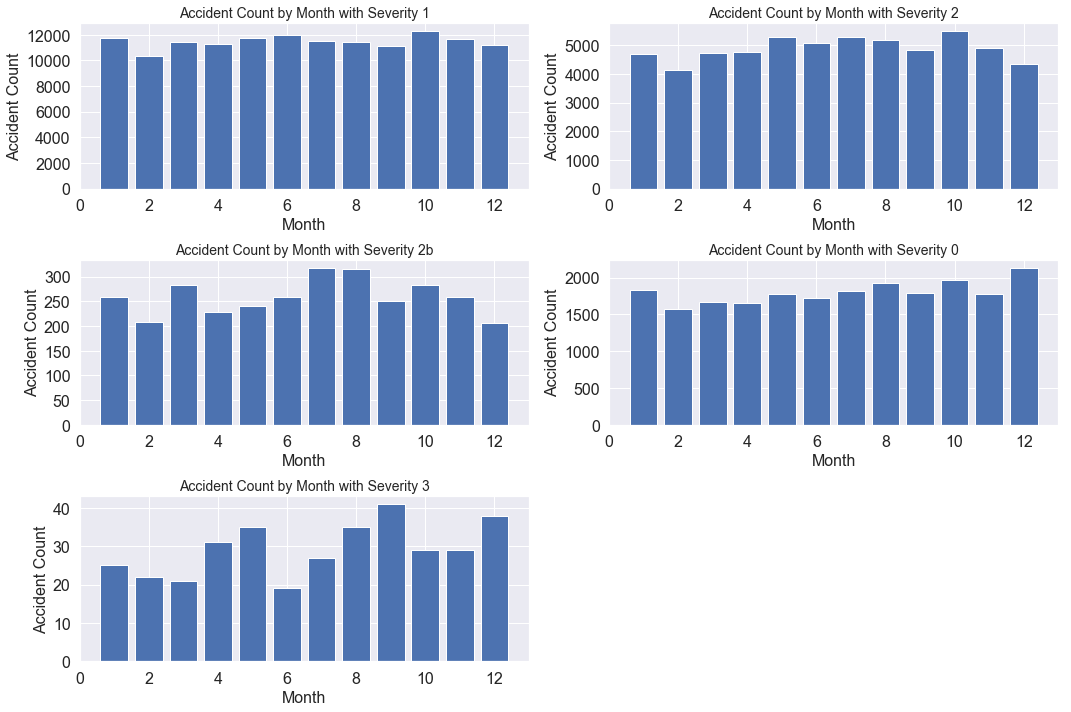

In [8]:
data['TIME'] = pd.to_datetime(data.INCDTTM)

fig, axes = plt.subplots(3,2,figsize=(15,10))
i = 0
for s in data["SEVERITYCODE"].unique():
    i = i + 1
    plt.subplot(3,2,i)
    plt.hist(pd.DatetimeIndex(data.loc[data["SEVERITYCODE"] == s]['TIME']).month, bins=[j for j in range(1,14)], align='left', rwidth=0.8)
    plt.title("Accident Count by Month with Severity " + str(s), fontsize=14)
    plt.xlabel("Month", fontsize=16)
    plt.ylabel("Accident Count", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
plt.tight_layout()
axes[2,1].remove() # to remove the empty plot that will be displayed at the end since there is no benefit in displaying it 
plt.show()

We can notice the following:
- Severity 1: the accidents count is almost equally distributed throughout the year. 
- Severity 2: accidents are more frequent during summer and fall
- Severity 2b: accidents are the highest during the summer
- Severity 0: Accidents are a little more frequent as the end of the year approaches
- Severity 3: Accidents are more frequent druing spring, summer and fall  
    
Therefore, this is an indicator that the weather conditions, light conditions (since they differ from a season to another) most probably impact accident count, as well as its severity, as well as other variables that we will explore later on.

Let us see if accident count and severity are affected by week days.

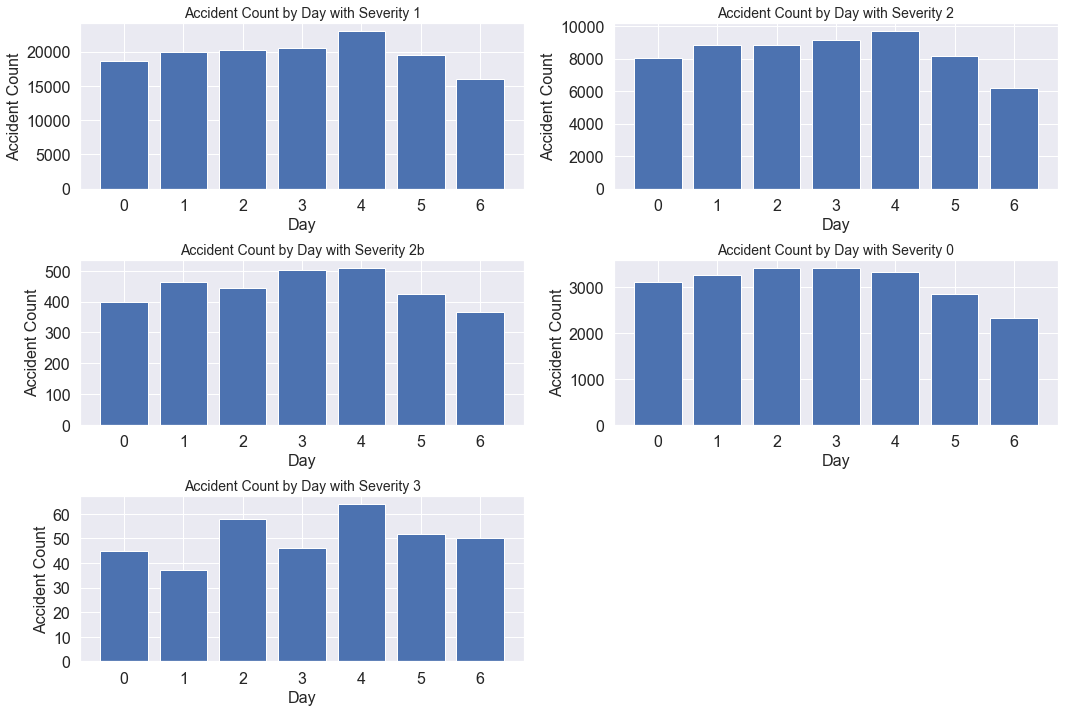

In [9]:
data['DAYOFWEEK'] = data["TIME"].dt.dayofweek

fig, axes = plt.subplots(3,2,figsize=(15,10))
i = 0
for s in data["SEVERITYCODE"].unique():
    i = i + 1
    plt.subplot(3,2,i)
    plt.hist(data.loc[data["SEVERITYCODE"] == s]['DAYOFWEEK'], bins=[j for j in range(0, 8)], align='left', rwidth=0.8)
    plt.title("Accident Count by Day with Severity " + str(s), fontsize=14)
    plt.xlabel("Day", fontsize=16)
    plt.ylabel("Accident Count", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
plt.tight_layout()
axes[2,1].remove()
plt.show()

In the plotted graphs, the first day of the week (0) is Monday. We can notice that there is an important drop in the count during weekends (5 and 6, i.e., Saturday and Sunday) across all severities. Moreover, we can see that it is not the case in Severity 3.  
  
Nevertheless, we could say that the attribute we have created, `DAYOFWEEK` is not of great impotance to predict an accident's severity since 4 out of 5 severities have very similiar distributions with respect to the day of the week.  
  
It is time to check the weather conditions, which are contained in the `WEATHER` field. It describes the weather condition when the accident took place.

In [10]:
len(data['WEATHER'].unique())

13

We have 13 categories for a weather condition. Let us check their relation to the aim of our work.

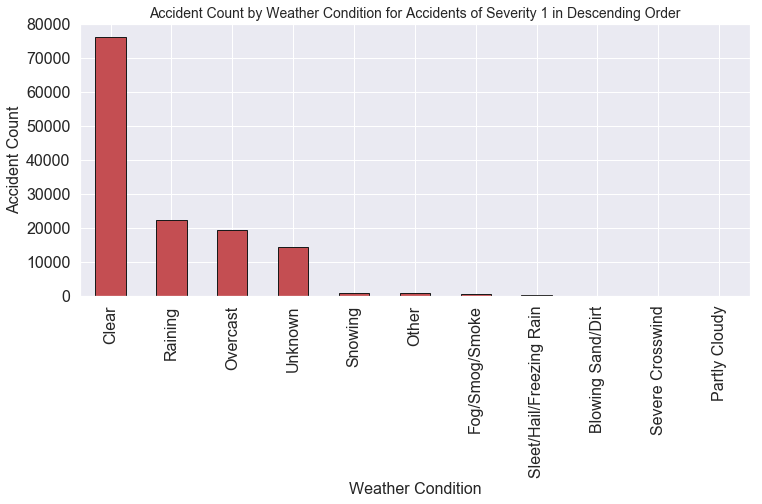

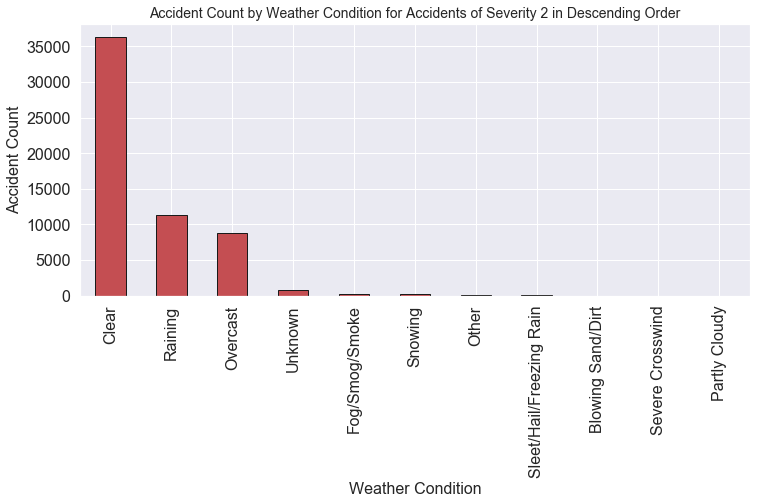

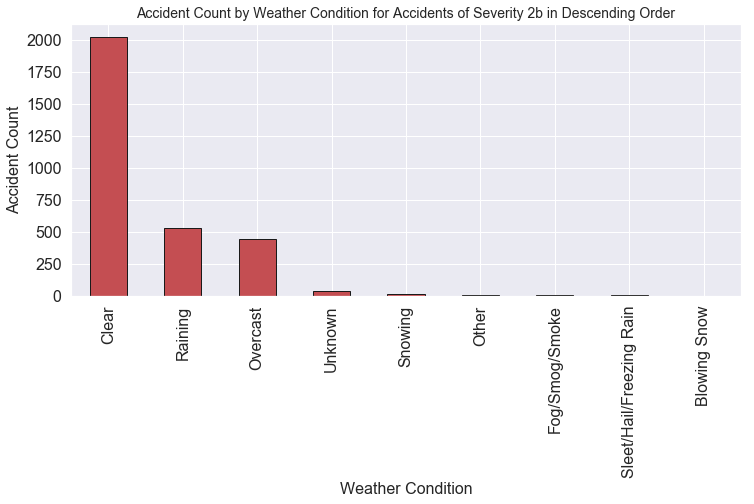

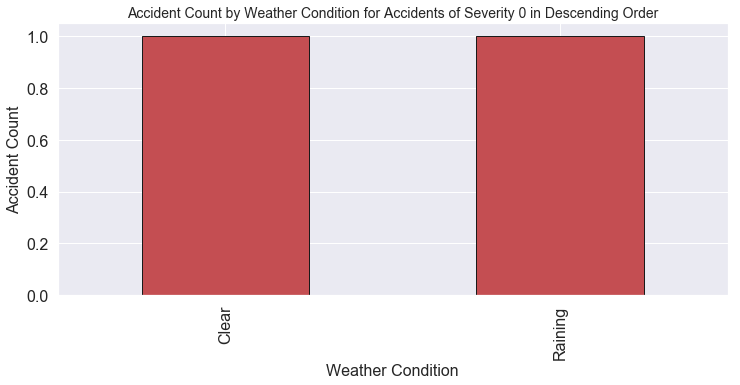

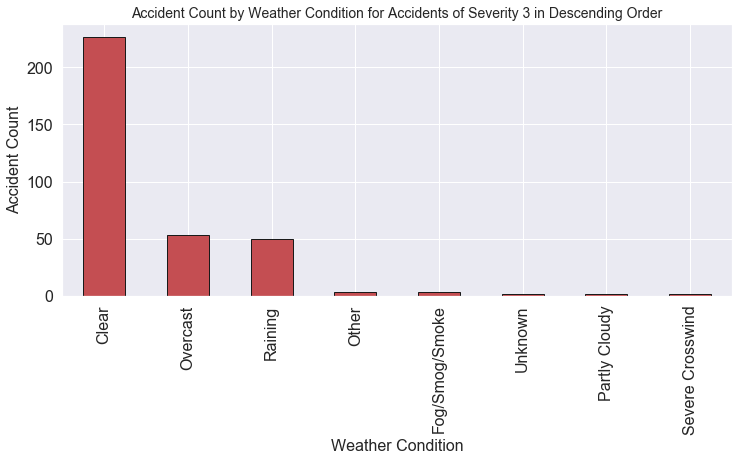

In [11]:
# plotting bar charts
for s in data["SEVERITYCODE"].unique():
    plt.subplots(figsize=(12,5))
    data.loc[data["SEVERITYCODE"] == s]["WEATHER"].value_counts().sort_values(ascending=False).plot.bar(width=0.5,color='r',edgecolor='k',align='center',linewidth=1)
    plt.xlabel("Weather Condition",fontsize=16)
    plt.ylabel("Accident Count",fontsize=16)
    plt.title("Accident Count by Weather Condition for Accidents of Severity " + str(s) + " in Descending Order",fontsize=14)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
plt.show()

In [12]:
data.WEATHER.unique()

array(['Clear', 'Raining', 'Overcast', nan, 'Unknown', 'Other', 'Snowing',
       'Sleet/Hail/Freezing Rain', 'Fog/Smog/Smoke', 'Blowing Sand/Dirt',
       'Severe Crosswind', 'Partly Cloudy', 'Blowing Snow'], dtype=object)

For all severities, we can see that the mojority of the accidents occurs under Clear, Raining and Overcast Weather. It is true that there as an important number of accidents where Severity is 1 and the weather condition is unknwon, but it does not break our general conclusion.  
    
We can also conclude that the weather condition is generally irrelevant to the accident severity. However, there are special weather conditions that are worth invstegating such as Snowing and Fog/Smog/Smoke, as well as similar conditions, that most probably affect an accident's severity (slippery road, unclear vision...). Not to mention that the weather conditions are not identically ordered in all of the graphs.
  
Nervetheless, there is a problem in hand that we would prefer to look at first. In Severity 0, there are only 2 accidents. Hence, we should check the reason behind this issue. Still, we will surely need to handle the missing data later on.

In [13]:
weather_s0 = data.loc[data["SEVERITYCODE"] == "0"]["WEATHER"] # weather condition where severity is 0

In [14]:
print("There are", len(weather_s0), "accidents of Severity 0")

There are 21656 accidents of Severity 0


In [15]:
weather_s0.isna().sum() # count the number of nan values in weather_s0

21654

There is our 2. Out of the 21656 observations in `WEATHER` where `SEVERITYCODE` is 0, we have 21654 nan values. The difference is exactly 2. This means that the weather condition is only known for 2 accidents: 1 Clear and 1 Raining. The weather condition for all the other accidents in this case is not available. Nevertheless, this inconsistency turned out to be insignificant.  
  
Let us take a look at the special weather conditions that we mentioned earlier.

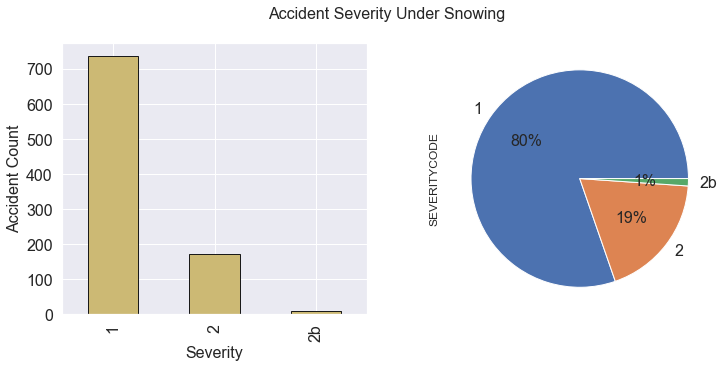

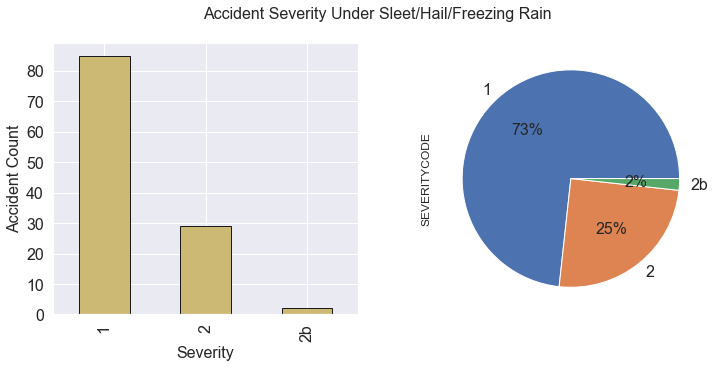

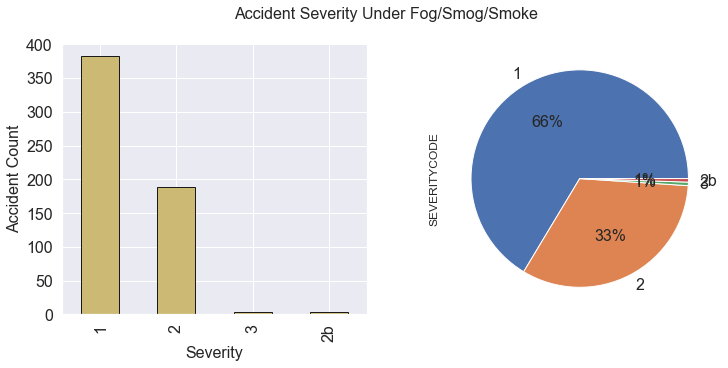

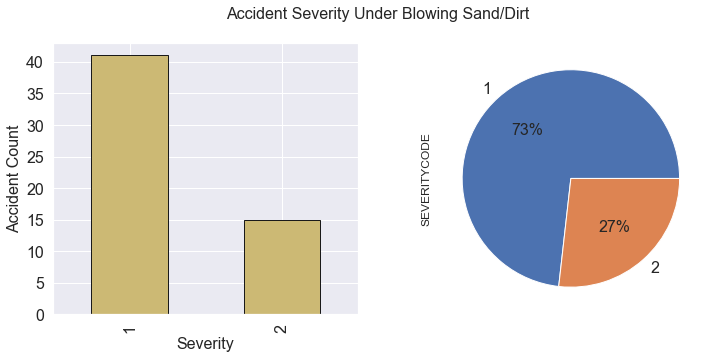

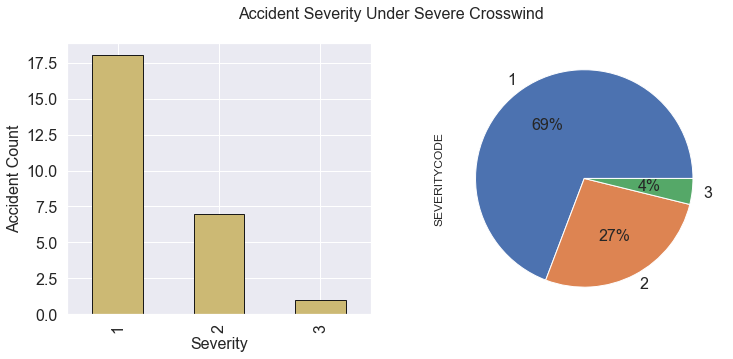

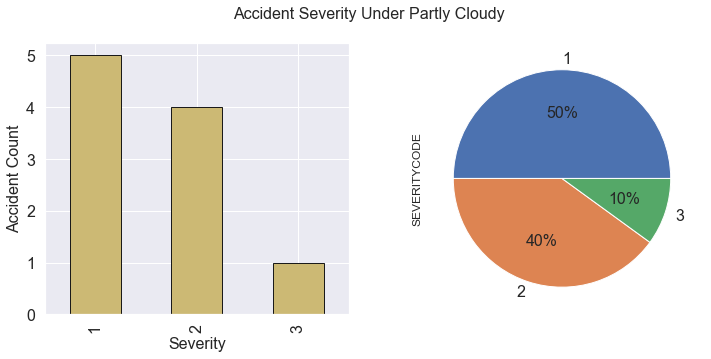

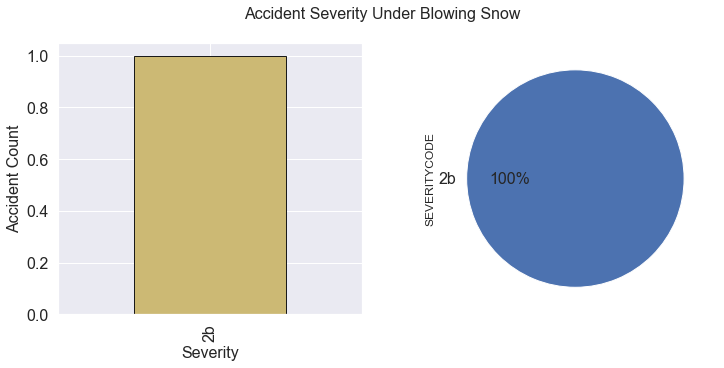

In [16]:
# severity by special condition
special_conditions = ["Snowing", "Sleet/Hail/Freezing Rain", "Fog/Smog/Smoke", "Blowing Sand/Dirt", "Severe Crosswind", "Partly Cloudy", "Blowing Snow"]

for sc in special_conditions:
    plt.subplots(1,2,figsize=(12,5))
    plt.suptitle("Accident Severity Under " + sc,fontsize=16)
    plt.subplot(1,2,1)
    data.loc[data["WEATHER"] == sc]["SEVERITYCODE"].value_counts().plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
    plt.xlabel("Severity",fontsize=16)
    plt.ylabel("Accident Count",fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.subplot(1,2,2)
    data.loc[data["WEATHER"] == sc]["SEVERITYCODE"].value_counts().plot.pie(autopct="%1.0f%%",fontsize=16)

It seems that there is a correlation between these conditions and the accident severity. For example, Severity 2 increased from 19% (under Snowing) to 40% (under Partly Cloudy), Severity 1 decreased from 80% to 50% and Severity 2b increased from 1% to 10%(under the same conditions, respectively). Another example is that under Blowing Snow, Severity 2b is 100%: this is an important mark for this Severity Code.

The `ROADCOND` field indicates the road's condition during the collision.

In [17]:
data["ROADCOND"].value_counts().to_frame("count")

,count
Dry,128660
Wet,48736
Unknown,15139
Ice,1232
Snow/Slush,1014
Other,136
Standing Water,119
Sand/Mud/Dirt,77
Oil,64


`LIGHTCOND`: condition of the light during the collision.

In [18]:
data["LIGHTCOND"].value_counts().to_frame("count")

,count
Daylight,119554
Dark - Street Lights On,50139
Unknown,13533
Dusk,6085
Dawn,2609
Dark - No Street Lights,1580
Dark - Street Lights Off,1239
Other,244
Dark - Unknown Lighting,24


`SPEEDING`: indicates whether speed played a role in the accident or not. If there was speeding, it is a 'Y' (yes), and 'NaN' if otherwise (no).

In [19]:
data["SPEEDING"].value_counts().to_frame("count")

,count
Y,9936


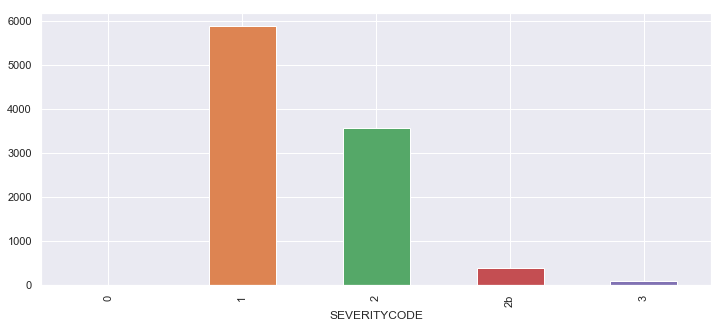

In [20]:
data.SPEEDING = pd.Series(np.where(data.SPEEDING.values == "Y", 1, 0), data.index) # replace 'Y' with 1 and NaN with 0
plt.subplots(figsize=(12,5))
data["SPEEDING"].groupby(data["SEVERITYCODE"]).sum().plot.bar()
plt.show()

`UNDERINFL`: whether the driver was under the influence of alcohol or drugs. '0' and 'N' stand for no, and '1' and 'Y' stand for yes.

In [21]:
data["UNDERINFL"].value_counts().to_frame("count")

,count
N,104001
0,81676
Y,5399
1,4230


`PERSONCOUNT` and `VEHCOUNT`: number of people and vehicles, respectively, involved in a crash.

In [22]:
data["PERSONCOUNT"].describe()

count    221737.000000
mean          2.226742
std           1.469702
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          93.000000
Name: PERSONCOUNT, dtype: float64

In [23]:
data["VEHCOUNT"].describe()

count    221737.000000
mean          1.729445
std           0.830529
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          15.000000
Name: VEHCOUNT, dtype: float64

`PEDCOUNT` and `PEDCYLCOUNT`: number of pedestrians and bycicles, respectively, involved in a crash.

In [24]:
data["PEDCOUNT"].describe()

count    221737.000000
mean          0.038095
std           0.201704
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: PEDCOUNT, dtype: float64

In [25]:
data["PEDCYLCOUNT"].describe()

count    221737.000000
mean          0.027348
std           0.164499
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: PEDCYLCOUNT, dtype: float64

In [26]:
data.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'TIME',
       'DAYOFWEEK'],
      dtype='object')

#### Data preprocessing

Checking for null and duplicate values.

In [27]:
data.isna().sum()

X                    7478
Y                    7478
OBJECTID                0
INCKEY                  0
COLDETKEY               0
REPORTNO                0
STATUS                  0
ADDRTYPE             3714
INTKEY             149711
LOCATION             4593
EXCEPTRSNCODE      120403
EXCEPTRSNDESC      209952
SEVERITYCODE            0
SEVERITYDESC            0
COLLISIONTYPE       26450
PERSONCOUNT             0
PEDCOUNT                0
PEDCYLCOUNT             0
VEHCOUNT                0
INJURIES                0
SERIOUSINJURIES         0
FATALITIES              0
INCDATE                 0
INCDTTM                 0
JUNCTIONTYPE        11979
SDOT_COLCODE            1
SDOT_COLDESC            1
INATTENTIONIND     191549
UNDERINFL           26431
WEATHER             26641
ROADCOND            26560
LIGHTCOND           26730
PEDROWNOTGRNT      216542
SDOTCOLNUM          94532
SPEEDING                0
ST_COLCODE           9412
ST_COLDESC          26450
SEGLANEKEY              0
CROSSWALKKEY

Rather than checking whether duplicated data exists (True) for every field or not (False), it is more convenient to first chekch the sum of the returned series (boolean mask): if the sum is 0, then all of the values held in the returned series is False, which means that there are no duplicates in our data and that there will be no need for further investigation.

In [28]:
data.duplicated().sum()

0

Now, we are going to select the fields that we believe to be relevant to our case.

In [29]:
data_clean = data[['X', 'Y', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
                   'SPEEDING', 'SEVERITYCODE', 'UNDERINFL',
                   'SERIOUSINJURIES', 'FATALITIES', 'INJURIES',
                   'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']]

data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221737 entries, 0 to 221737
Data columns (total 15 columns):
X                  214259 non-null float64
Y                  214259 non-null float64
WEATHER            195096 non-null object
ROADCOND           195177 non-null object
LIGHTCOND          195007 non-null object
SPEEDING           221737 non-null int32
SEVERITYCODE       221737 non-null object
UNDERINFL          195306 non-null object
SERIOUSINJURIES    221737 non-null int64
FATALITIES         221737 non-null int64
INJURIES           221737 non-null int64
PERSONCOUNT        221737 non-null int64
PEDCOUNT           221737 non-null int64
PEDCYLCOUNT        221737 non-null int64
VEHCOUNT           221737 non-null int64
dtypes: float64(2), int32(1), int64(7), object(5)
memory usage: 36.2+ MB


While exploring the data, we actually cleaned `SPEEDING`. Let us do further cleaning where it needs to be done.  
  
Values such as 'Other' and 'Unknwon' will be considered as 'NaN', as well as Severity 0 since it means 'Unknown Severity'.

In [30]:
data_clean.replace("Unknown", np.nan, inplace=True)
data_clean.replace("Other", np.nan, inplace=True)
data_clean["SEVERITYCODE"].replace("0", np.nan, inplace=True)

Let us take a look at our dataset to get a better understanding on how to deal with missing records.

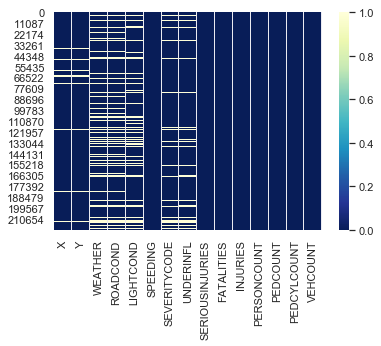

In [31]:
sns.heatmap(data_clean.isnull(), cmap="YlGnBu_r")
plt.show()

In [32]:
# maximum number of NaNs divided by the totel number of entries: this shows the percentage of the data that we consider to drop
data_drop_per = (data_clean.isnull().sum(axis=0).max() / len(data_clean)) * 100
data_drop_per = round(data_drop_per, 2)
print("Data to be dropped:", data_drop_per, "%.")

Data to be dropped: 19.23 %.


We are considerting to drop 19.23% of our data. Normally, this would cause a problem. However, we have a total of 221737 records. Therefore, we have sufficient data: our data will not be biased and our model's accuracy shall not be affected.

In [33]:
data_clean.dropna(axis=0, inplace=True)

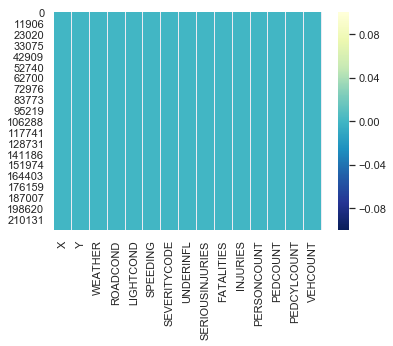

In [34]:
sns.heatmap(data_clean.isnull(), cmap="YlGnBu_r")
plt.show()

We can see that there are no more null values in our data.  

Recall that `UNDERINFL` has 2 categories for a yes and 2 for no. Let us fix that issue.

In [35]:
data_clean["UNDERINFL"] = data_clean["UNDERINFL"].map({"N": 0, "0": 0, "Y": 1, "1": 1})

In [36]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171504 entries, 0 to 221737
Data columns (total 15 columns):
X                  171504 non-null float64
Y                  171504 non-null float64
WEATHER            171504 non-null object
ROADCOND           171504 non-null object
LIGHTCOND          171504 non-null object
SPEEDING           171504 non-null int64
SEVERITYCODE       171504 non-null object
UNDERINFL          171504 non-null int64
SERIOUSINJURIES    171504 non-null int64
FATALITIES         171504 non-null int64
INJURIES           171504 non-null int64
PERSONCOUNT        171504 non-null int64
PEDCOUNT           171504 non-null int64
PEDCYLCOUNT        171504 non-null int64
VEHCOUNT           171504 non-null int64
dtypes: float64(2), int64(9), object(4)
memory usage: 20.9+ MB


We can see now that our data in consistent. Next, we need to encode categorical data. But prior to that, let us see the correlation between the different pair of fields from our dataframe (the lighter the color => the stronger the positive correlation, and the darker the color => the stronger the negative correlation)

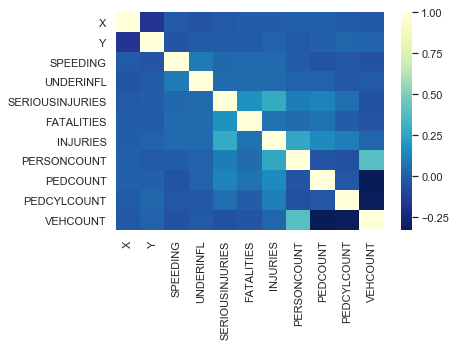

In [37]:
sns.heatmap(data_clean.corr(), cmap="YlGnBu_r")
plt.show()

Let us start with the encoding the categorical fields `WEATHER`, `ROADCOND` and `LIGHTCOND`.

In [38]:
data_clean = pd.concat([data_clean.drop(["WEATHER", "ROADCOND", "LIGHTCOND"], axis=1),
                        pd.get_dummies(data_clean["WEATHER"]),
                        pd.get_dummies(data_clean["ROADCOND"]),
                        pd.get_dummies(data_clean["LIGHTCOND"])], axis=1)

Since our dataset is unbalanced, we have to shuffle it.

In [39]:
# .sample() for frac=1 returns a full random sample of the data, i.e., shuffles the data
data_clean = data_clean.sample(frac=1).reset_index(drop=True)

Displaying 5 first elements from our dataset in Transpose view in order to check for proper encoding and shuffling.

In [40]:
data_clean.head().T

,0,1,2,3,4
X,-122.306,-122.377,-122.349,-122.313,-122.344
Y,47.5855,47.5356,47.6144,47.5741,47.6129
SPEEDING,0,0,0,0,0
SEVERITYCODE,2,1,1,2,1
UNDERINFL,0,0,0,1,0
SERIOUSINJURIES,0,0,0,0,0
FATALITIES,0,0,0,0,0
INJURIES,2,0,0,1,0
PERSONCOUNT,3,4,0,3,2
PEDCOUNT,0,0,0,0,0


We can notice that we have successfully encoded our data and the shuffling is done. Let us recheck the correlation after the 2 previous steps were done. Studying the correlation between different features can help us to develop a better understanding of the data.

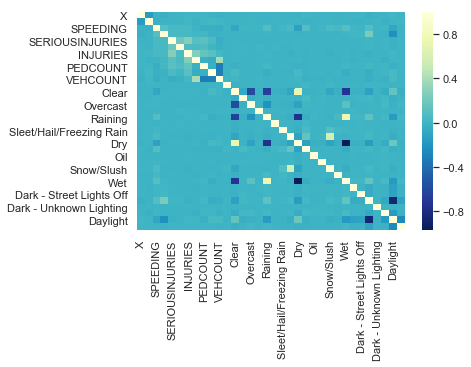

In [41]:
sns.heatmap(data_clean.corr(), cmap="YlGnBu_r")
plt.show()

It is obvious from the map above that certain features do have strong positive or negative correlation, while the majority has a weak or no correlation at all.

One more thing that we need to do before starting testing different classification algorithms on our dataset. We need to construct the features dataset and the class dataset.

In [42]:
from sklearn.preprocessing import StandardScaler

x = data_clean.drop(["SEVERITYCODE"], axis=1)
y = data_clean["SEVERITYCODE"]
data_clean_scaled = StandardScaler().fit(x).transform(x)

In [43]:
data_clean_scaled[0:2] # printing 2 samples of the scaled dataset

array([[ 0.83235413, -0.58786028, -0.23628704, -0.23847975, -0.10640209,
        -0.04123484,  1.95755408,  0.34089824, -0.21020289, -0.1856599 ,
         0.05721618, -0.01565095,  0.74472739, -0.05646148, -0.43411752,
        -0.00763617, -0.48292009, -0.01207437, -0.02521821, -0.06952435,
         0.62623344, -0.07949479, -0.0169053 , -0.0183929 , -0.06973573,
        -0.02391113, -0.60720945, -0.08993346, -0.0807113 , -0.61619157,
        -0.01024523, -0.12010997,  0.71342445, -0.18553062],
       [-1.54899134, -1.46725045, -0.23628704, -0.23847975, -0.10640209,
        -0.04123484, -0.57981629,  1.04135125, -0.21020289, -0.1856599 ,
         0.05721618, -0.01565095,  0.74472739, -0.05646148, -0.43411752,
        -0.00763617, -0.48292009, -0.01207437, -0.02521821, -0.06952435,
         0.62623344, -0.07949479, -0.0169053 , -0.0183929 , -0.06973573,
        -0.02391113, -0.60720945, -0.08993346, -0.0807113 , -0.61619157,
        -0.01024523, -0.12010997,  0.71342445, -0.18553062]])

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_clean_scaled, y, test_size=0.2, random_state=4)

#### Modeling and Evaluation

We are mainly going to use 4 calssification alogrithms: Logistic Regression, K-Nearest Neighbors, Desicion Tree, and Random Forest.

Let us start with `Logistic Regression`.

In [45]:
from sklearn.linear_model import LogisticRegression

log_classifier = LogisticRegression(C=0.01)
log_classifier.fit(x_train, y_train)
log_classifier

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
y_pred = log_classifier.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     22654
           2       1.00      1.00      1.00     11003
          2b       1.00      0.97      0.98       575
           3       1.00      0.96      0.98        69

   micro avg       1.00      1.00      1.00     34301
   macro avg       1.00      0.98      0.99     34301
weighted avg       1.00      1.00      1.00     34301



Checking our model's accuracy on the testing set.

In [47]:
log_acc_test = log_classifier.score(x_test, y_test)
print("Logistic Regression Accuracy on Testing Set:", log_acc_test * 100, "%")

Logistic Regression Accuracy on Testing Set: 99.94169266202152 %


Let us check the model's accuracy on the training set.

In [48]:
log_acc_train = log_classifier.score(x_train, y_train)
print("Logistic Regression Accuracy on Training Set:", log_acc_train * 100, "%")

Logistic Regression Accuracy on Training Set: 99.95845571889828 %


Let us create an empty list to mainly store the accuracy scores of the models.

Plotting the confusion matrix to take a deeper look at our model's performance

In [49]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[22654,     0,     0,     0],
       [    0, 11003,     0,     0],
       [    0,    17,   558,     0],
       [    0,     2,     1,    66]], dtype=int64)

Let us plot the confusion matrix for a better visualization. Moreover, due to later use, we shall create a function for drawing the confusion matrix.

In [50]:
def draw_confusion_matrix(confusion_mat):
    df_cm = pd.DataFrame(confusion_mat, columns=np.unique(y_test), index = np.unique(y_test))
    df_cm.index.name = "Actual"
    df_cm.columns.name = "Predicted"
    plt.figure(figsize = (10,7))
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, cmap="Blues", annot=True, fmt="g", annot_kws={"size": 16})

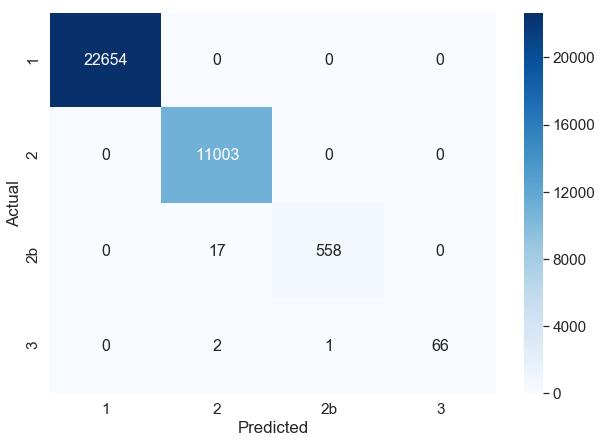

In [51]:
draw_confusion_matrix(cm)

The way to look at is the following:
- for the actual values, we calculate the sum of every row:
    * Severity 1: 22654 + 0 + 0 + 0 = 22654 => 22654 actual crashes of Severity 1
    * Severity 2: 11003 actual crashes of Severity 2
    * Severity 2b: 0 + 17 + 558 + 0 = 575 actual crashes
    * Sevrity 3: 0 + 2 + 1 + 66 = 69 actual crashes  


- for the predicted values, we calculate the sum of every column:
    * Severity 1: 0 + 0 + 0 + 22654 = 22654 => 22654 predicted crashes
    * Severity 2: 2 + 17 + 11003 + 0 = 11022 => 11022 predicted crashes
    * Severity 2b: 559 predicted crashes
    * Severity 3: 66 predicted crashes
    
A False Potisive (FP) is when the model predicts that an observation is of class A but it is actually not (Type I error).  
A False Negative (NP) is when the model predicts that an obesrvation is not of class A but it actually is (Type II error).
- Severity 1: all the predictions of Severity 1 were true.
- Severity 2: 17 + 2 = 19 FPs, i.e., predicted to be of Severity 2 but they are actually not. 17 are actually of Severity 2b and 2 are of Severity 3.
- Severity 2b: 1 FP and 17 FNs. The 1 FP was predicted to be of Severity 2b but it is of Severity 3, and the 17 FNs are the ones that were not predicted to be of Severity 2b (predicted to be of Severity 2), but they are actually of Severity 2b.
- Severity 3: 2 + 1 = 3 FNs. 3 are of Severity 3, but 2 were predicted to be of Severity 2, and 1 of Severity 2b.

`Support Vector Machine`

In [52]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel = "linear", random_state = 0)
svm_classifier.fit(x_train, y_train)
svm_classifier

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [53]:
y_pred = svm_classifier.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     22654
           2       1.00      1.00      1.00     11003
          2b       1.00      1.00      1.00       575
           3       1.00      1.00      1.00        69

   micro avg       1.00      1.00      1.00     34301
   macro avg       1.00      1.00      1.00     34301
weighted avg       1.00      1.00      1.00     34301



In [54]:
svm_acc_test = svm_classifier.score(x_test, y_test)
print("SVM Accuracy on Testing Set:", svm_acc_test * 100, "%")

SVM Accuracy on Testing Set: 100.0 %


In [55]:
svm_acc_train = svm_classifier.score(x_train, y_train)
print("SVM Accuracy on Training Set:", svm_acc_train * 100, "%")

SVM Accuracy on Training Set: 100.0 %


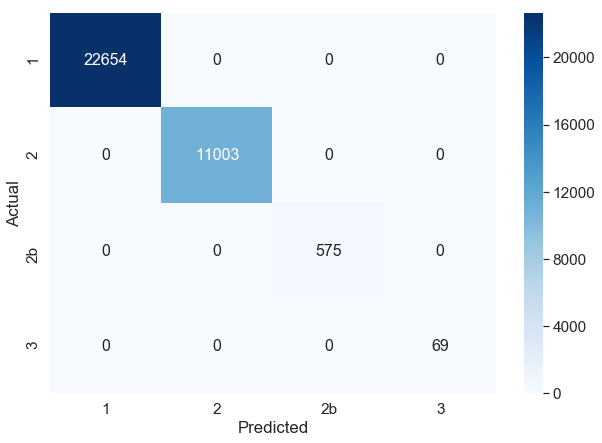

In [56]:
cm = confusion_matrix(y_test, y_pred)
draw_confusion_matrix(cm)

`Decision Tree`

In [57]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=5)
dt_classifier.fit(x_train, y_train)
dt_classifier

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [58]:
y_pred = dt_classifier.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     22654
           2       1.00      1.00      1.00     11003
          2b       1.00      1.00      1.00       575
           3       1.00      1.00      1.00        69

   micro avg       1.00      1.00      1.00     34301
   macro avg       1.00      1.00      1.00     34301
weighted avg       1.00      1.00      1.00     34301



In [59]:
dt_acc_test = dt_classifier.score(x_test, y_test)
print("Decision Tree Accuracy on Testing Set:", dt_acc_test * 100, "%")

Decision Tree Accuracy on Testing Set: 100.0 %


In [60]:
dt_acc_train = dt_classifier.score(x_train, y_train)
print("Decision Tree Accuracy on Training Set:", dt_acc_train * 100, "%")

Decision Tree Accuracy on Training Set: 100.0 %


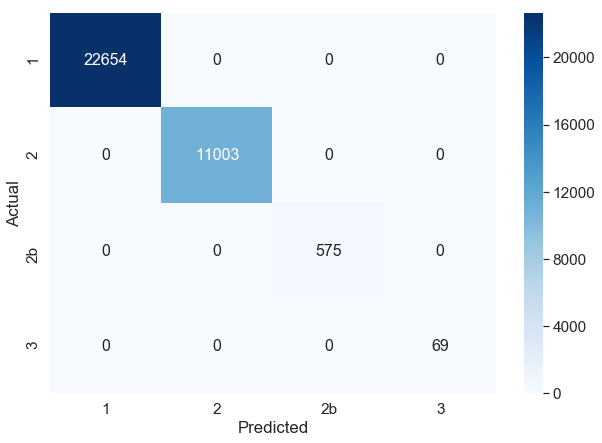

In [61]:
cm = confusion_matrix(y_test, y_pred)
draw_confusion_matrix(cm)

`Random Forest`

In [62]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = "entropy", random_state = 0)
rf_classifier.fit(x_train, y_train)
rf_classifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [63]:
y_pred = rf_classifier.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     22654
           2       1.00      1.00      1.00     11003
          2b       1.00      1.00      1.00       575
           3       1.00      0.88      0.94        69

   micro avg       1.00      1.00      1.00     34301
   macro avg       1.00      0.97      0.98     34301
weighted avg       1.00      1.00      1.00     34301



In [64]:
rf_acc_test = rf_classifier.score(x_test, y_test)
print("Random Forest Accuracy on Testing Set:", rf_acc_test * 100, "%")

Random Forest Accuracy on Testing Set: 99.97667706480861 %


In [65]:
rf_acc_train = rf_classifier.score(x_train, y_train)
print("Random Forest Accuracy on Testing Set:", rf_acc_train * 100, "%")

Random Forest Accuracy on Testing Set: 100.0 %


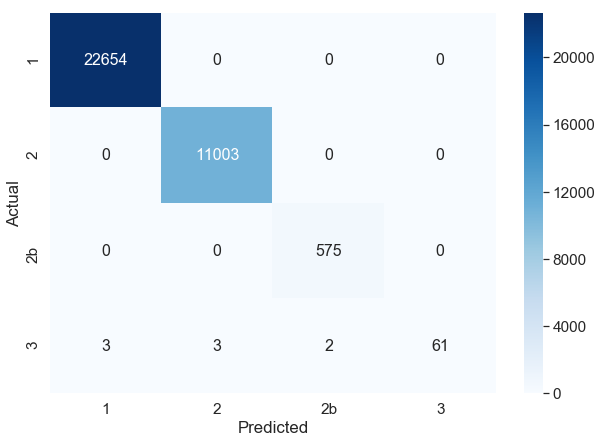

In [66]:
cm = confusion_matrix(y_test, y_pred)
draw_confusion_matrix(cm)

<a name="results_and_discussion"></a>

## Results and Discussion

In [67]:
# first, define a function to only display 2 digits after the decimal point
import math

def truncate_float(f):
    return math.floor(f * 10 ** 2) / 10 ** 2

Displaying the model's accuracies on the training set.

In [68]:
algo_list = ["Logistic Regression", "Support Vector Machine", "Decision Tree", "Random Forest"]
acc_train_list = [log_acc_train, svm_acc_train, dt_acc_train, rf_acc_train]
for algo_name, acc_val in list(zip(algo_list, acc_train_list)):
    print(algo_name, "Accuracy Score on Training Set:", truncate_float(acc_val))

Logistic Regression Accuracy Score on Training Set: 0.99
Support Vector Machine Accuracy Score on Training Set: 1.0
Decision Tree Accuracy Score on Training Set: 1.0
Random Forest Accuracy Score on Training Set: 1.0


Plotting the model's accuracies on the testing set for comparison and discussion.

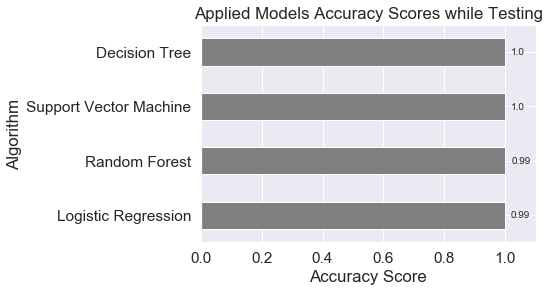

In [69]:
acc_test_list = [log_acc_test, svm_acc_test, dt_acc_test, rf_acc_test]
col_dict = {"Algorithm": algo_list, "Accuracy": acc_test_list}
df_acc = pd.DataFrame(col_dict).sort_values(by=["Accuracy"], ascending=True)
ax = df_acc.plot.barh("Algorithm", "Accuracy", align="center", legend=False, color="0.5")
for i in ax.patches:
    ax.text(i.get_width()+0.02, i.get_y()+0.2, str(truncate_float(i.get_width())), fontsize=10)
plt.xlim(0, 1.1)
plt.xlabel("Accuracy Score")
plt.title("Applied Models Accuracy Scores while Testing")
plt.show()

All of the 4 algorithms had a very high accuracy score (above 99%). 2 algorithms, Support Vector Machine and Decision Tree achieved 100% accuracy. This means that our developed models are able to accurately predict an accident's severity. The above horizontal bar plot represents the accuracy score of each model in ascending order (on the graph, from the bottom to the top). Not to forget that the accuracy scores of all 4 models on the training set is excellent as well.

<a name="conclusion"></a>

## Conclusion

After preprocessing the data, we were able to test 4 algorithms, all of which showed excellent accuracy. Two of the algorhimts showed an accuracy of 100%, and the other two showed approximately 99.9%, i.e., almost 100%. These high level of accuracies were achieved on both training and testing sets. 

Our models were well trained and fit to the training data, and that it had excellent performance on the testing set. We could claim that our data was handled quite well.

Therefore, we can state that all of the four models can accurately predict a car accident's severity in the city of Seattle.